In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

In [2]:
img_width = 200
img_height = 200

train_data_dir = r"D:\PROJECT\Module 1\Data\Train"
validation_data_dir = r"D:\PROJECT\Module 1\Data\Validation"
train_samples = 1340
validation_samples = 240
epochs = 10
batch_size = 16

# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 activation (Activation)     (None, 198, 198, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 97, 97, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                   

In [5]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img), np.array(label)])
    shuffle(traning_data)
    np.save('train_data.npy', traning_data)
    return training__data

In [6]:
import tensorflow.keras
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=tensorflow.keras.optimizers.Adam(learning_rate=.0001),
              metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 1340 images belonging to 2 classes.


In [9]:
print(train_generator.class_indices)

{'Hardhat': 0, 'Safety_West': 1}


In [10]:
imgs, labels = next(train_generator)

In [11]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

c:\python39\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


16
0.0


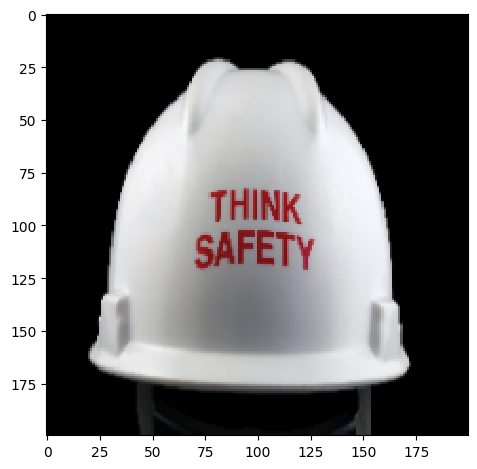

0.0


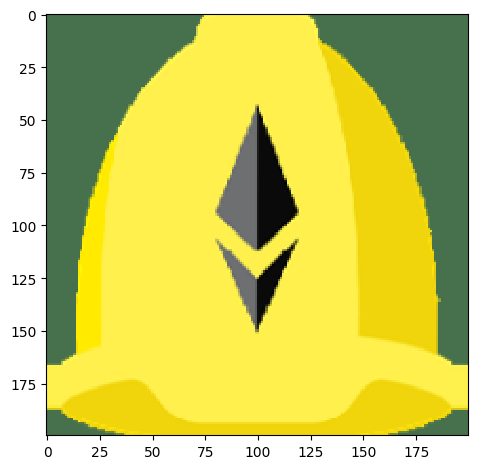

0.0


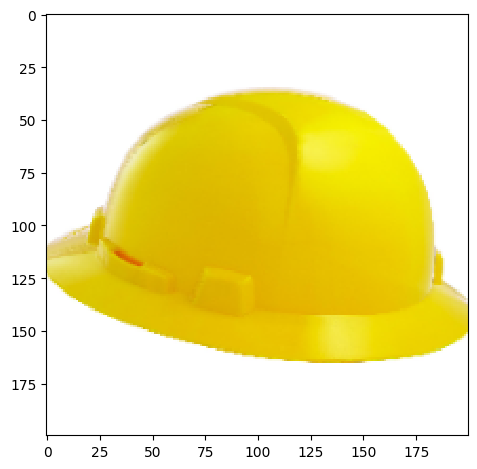

0.0


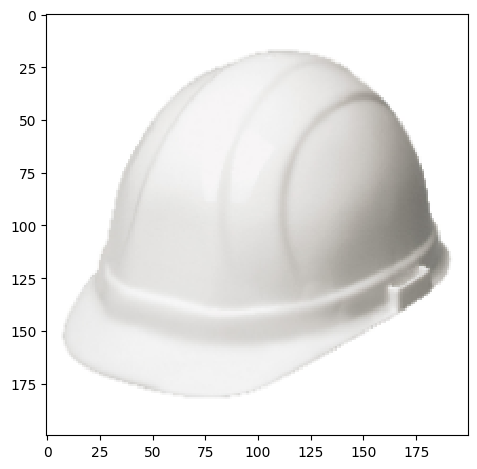

1.0


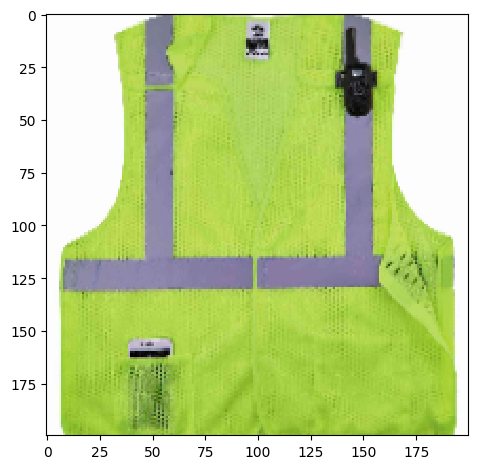

1.0


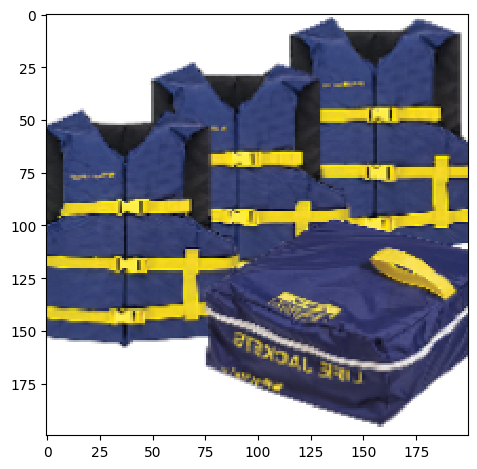

0.0


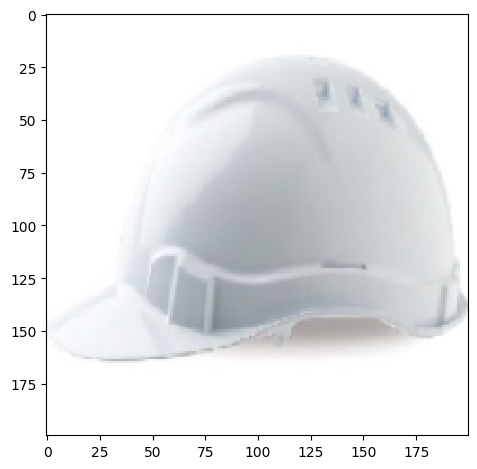

1.0


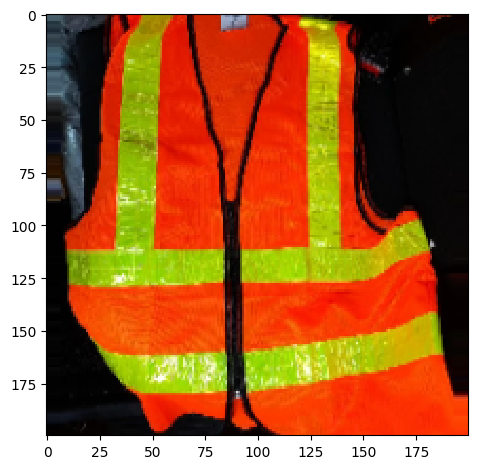

0.0


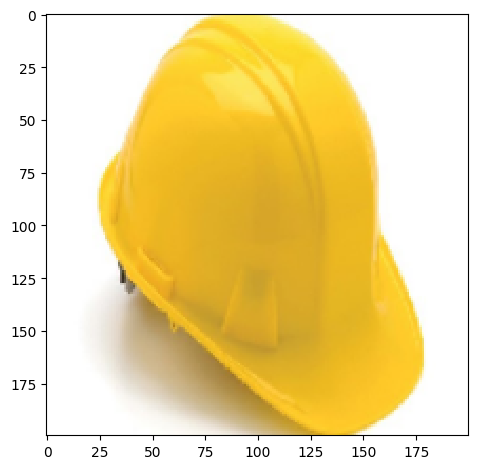

1.0


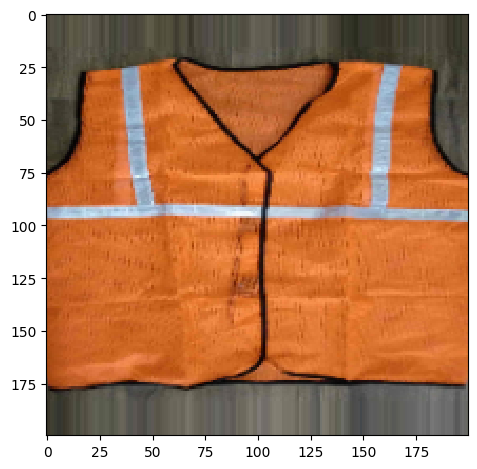

0.0


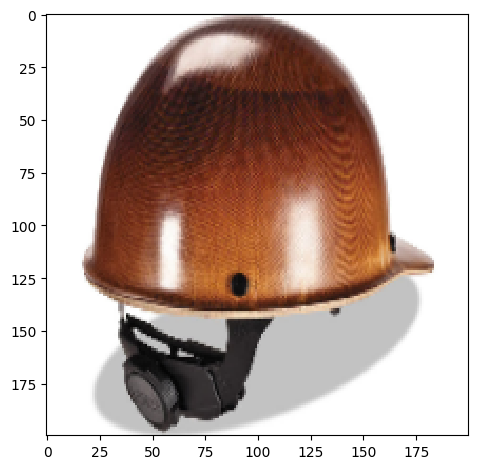

1.0


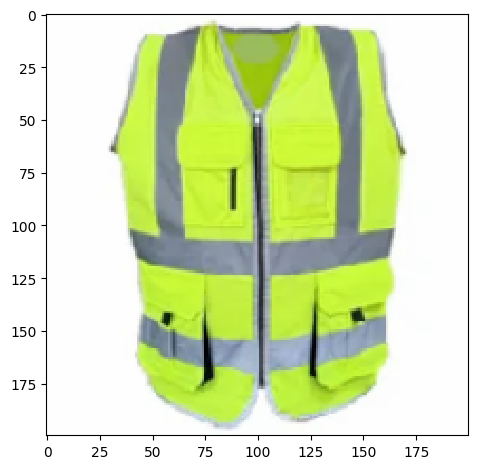

0.0


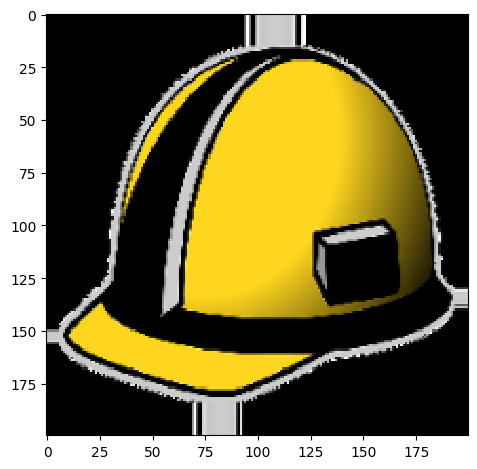

0.0


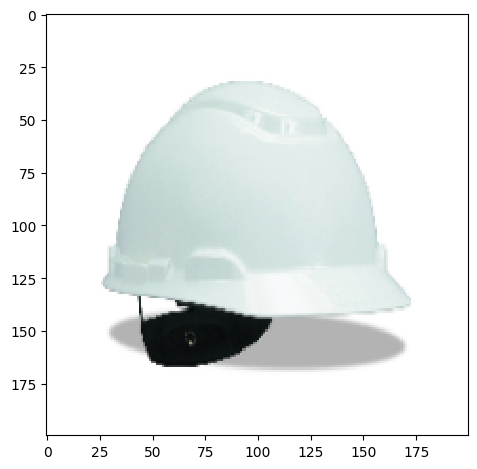

0.0


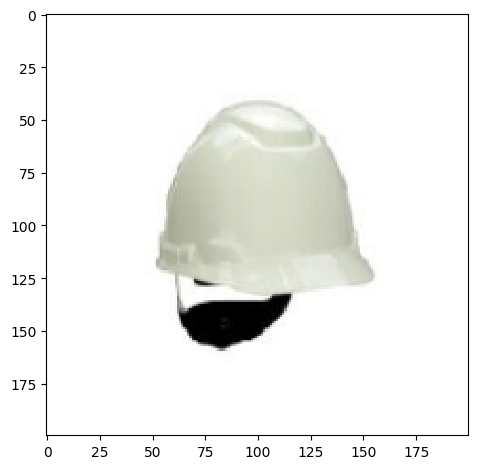

1.0


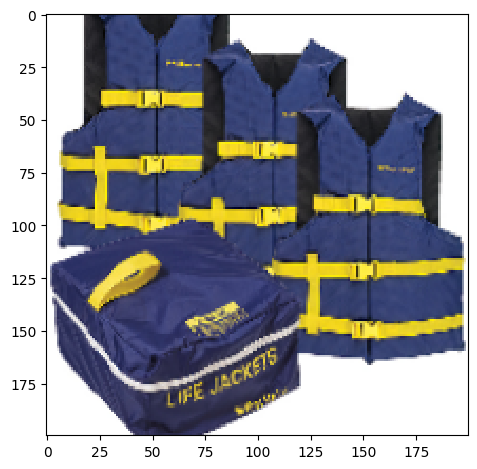

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [13]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 240 images belonging to 2 classes.


In [14]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a generator.
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

C:\Users\pramo\AppData\Local\Temp\ipykernel_18460\2809503825.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
83/83 [==============================] - 77s 902ms/step - loss: 0.5998 - accuracy: 0.6692 - val_loss: 0.4554 - val_accuracy: 0.8167
Epoch 2/10
83/83 [==============================] - 57s 682ms/step - loss: 0.4172 - accuracy: 0.8308 - val_loss: 0.3357 - val_accuracy: 0.8833
Epoch 3/10
83/83 [==============================] - 57s 690ms/step - loss: 0.2761 - accuracy: 0.9079 - val_loss: 0.1777 - val_accuracy: 0.9417
Epoch 4/10
83/83 [==============================] - 55s 663ms/step - loss: 0.1779 - accuracy: 0.9464 - val_loss: 0.1456 - val_accuracy: 0.9500
Epoch 5/10
83/83 [==============================] - 57s 680ms/step - loss: 0.1408 - accuracy: 0.9615 - val_loss: 0.0699 - val_accuracy: 0.9875
Epoch 6/10
83/83 [==============================] - 60s 716ms/step - loss: 0.0974 - accuracy: 0.9721 - val_loss: 0.0872 - val_accuracy: 0.9708
Epoch 7/10
83/83 [==============================] - 59s 706ms/step - loss: 0.0818 - accuracy: 0.9773 - val_loss: 0.0482 - val_accuracy: 0.9958

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


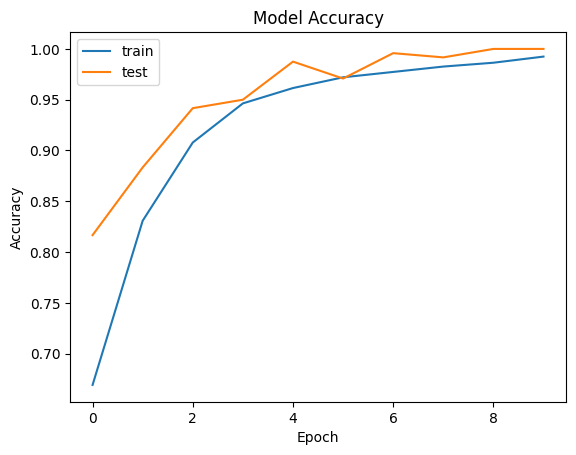

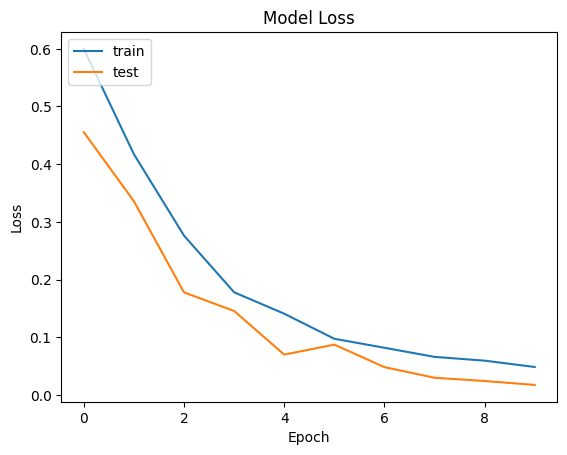

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("Accuracy.png")
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("Loss.png")
plt.show()

In [16]:
from tensorflow.keras.models import load_model
model.save('Construction_Safety_Model.h5')
cnn = load_model('Construction_Safety_Model.h5')

c:\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from tensorflow.keras.models import load_model
model = load_model('Construction_Safety_Model.h5')

In [18]:
predict_dir_path=r"D:\PROJECT\Module 1\Data\Test"
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['hardhat_40.jpeg', 'hardhat_449.jpeg', 'hardhat_450.jpeg', 'hardhat_456.png', 'hardhat_462.jpeg', 'hardhat_464.jpeg', 'hardhat_468.jpeg', 'hardhat_471.jpeg', 'hardhat_472.jpeg', 'hardhat_490.jpeg', 'hardhat_50.jpeg', 'hardhat_51.png', 'hardhat_52.jpeg', 'hardhat_529.jpeg', 'hardhat_55.jpeg', 'hardhat_60.jpeg', 'hardhat_65.jpeg', 'hardhat_67.jpeg', 'hardhat_68.jpeg', 'hardhat_69.jpeg', 'hardhat_73.jpeg', 'hardhat_75.jpeg', 'hardhat_76.png', 'hardhat_83.jpeg', 'hardhat_838.jpeg', 'hardhat_849.png', 'hardhat_86.jpeg', 'hardhat_864.jpeg', 'hardhat_872.jpeg', 'hardhat_909.jpeg', 'hardhat_910.jpeg', 'hardhat_911.jpeg', 'hardhat_92.jpeg', 'hardhat_927.jpeg', 'hardhat_94.jpeg', 'hardhat_962.jpeg', 'hardhat_963.jpeg', 'hardhat_964.jpeg', 'hardhat_965.jpeg', 'hardhat_967.jpeg', 'hardhat_968.jpeg', 'hardhat_969.jpeg', 'hardhat_97.jpeg', 'hardhat_975.png', 'hardhat_976.jpeg', 'hardhat_98.jpeg', 'hardhat_980.jpeg', 'hardhat_981.jpeg', 'hardhat_99.jpeg', 'hardhat_995.jpeg', 'safety west_30.jpeg', '

In [19]:
# predicting images
from tensorflow.keras.preprocessing import image
Hardhat = 0
Safety_West  = 0

actual  = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
predicted  = []

for file in onlyfiles:
    img = image.load_img(predict_dir_path+'/'+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'Hardhat')
        Hardhat += 1
        predicted.append(0)
    else:
        print(file + ": " + 'Safety_West')
        Safety_West += 1
        predicted.append(1)
print("Total Hardhat Images :",Hardhat)
print("Total Safety_west Images :",Safety_West)
print("actual :",actual)
print("predicted :",predicted)

1/1 [==============================] - 0s 307ms/step
hardhat_40.jpeg: Hardhat
1/1 [==============================] - 0s 62ms/step
hardhat_449.jpeg: Hardhat
1/1 [==============================] - 0s 60ms/step
hardhat_450.jpeg: Safety_West
1/1 [==============================] - 0s 56ms/step
hardhat_456.png: Hardhat
1/1 [==============================] - 0s 63ms/step
hardhat_462.jpeg: Hardhat
1/1 [==============================] - 0s 50ms/step
hardhat_464.jpeg: Hardhat
1/1 [==============================] - 0s 54ms/step
hardhat_468.jpeg: Hardhat
1/1 [==============================] - 0s 50ms/step
hardhat_471.jpeg: Hardhat
1/1 [==============================] - 0s 53ms/step
hardhat_472.jpeg: Hardhat
1/1 [==============================] - 0s 60ms/step
hardhat_490.jpeg: Hardhat
1/1 [==============================] - 0s 50ms/step
hardhat_50.jpeg: Safety_West
1/1 [==============================] - 0s 58ms/step
hardhat_51.png: Hardhat
1/1 [==============================] - 0s 62ms/step
hardhat_

In [20]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(actual,predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[50  0]
 [ 9 41]]


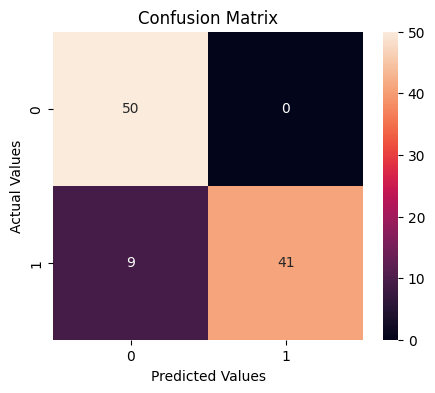

In [21]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(matrix, annot=True) 
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()